In [2]:
!pip install torch

  Using cached torch-2.0.1-cp38-cp38-win_amd64.whl (172.4 MB)



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
!git clone https://github.com/ultralytics/yolov5
cd yolov5

In [1]:
cd yolov5

D:\personal_project\yolov5


In [5]:
pip list

Package                            Version
---------------------------------- --------------------
absl-py                            1.4.0
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
asttokens                          2.2.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
import keras.optimizers as ko
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.python.framework.ops import EagerTensor
from matplotlib.pyplot import imshow
import torch
import cv2
import os
import copy
%matplotlib inline

In [2]:
import torch
import utils
display = utils.notebook_init()  # checks

ModuleNotFoundError: No module named 'utils'

In [3]:
os.getcwd()

'D:\\personal_project'

In [4]:
cd yolov5

D:\personal_project\yolov5


In [28]:
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source data/images

detect: weights=['yolov5s.pt'], source=data/images, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-215-ga6659d0 Python-3.8.8 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/2 D:\personal_project\yolov5\data\images\bus.jpg: 640x480 4 persons, 1 bus, 434.9ms
image 2/2 D:\personal_project\yolov5\data\images\zidane.jpg: 384x640 2 persons, 2 ties, 274.8ms
Speed: 3.0ms pre-process, 354.8ms inference, 9.2ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp3


In [5]:
yolo_model = torch.hub.load("ultralytics/yolov5","custom","yolov5s.pt")

Using cache found in C:\Users\Hp/.cache\torch\hub\ultralytics_yolov5_master
requirements: Ultralytics requirement ['setuptools>=65.5.1'] not found, attempting AutoUpdate...
requirements:  AutoUpdate skipped (offline)
YOLOv5  2023-6-9 Python-3.8.8 torch-2.0.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [30]:
temp = cv2.imread('D:\\personal_project\\test_1.jpg')
image = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
duplicate = copy.copy(image)
%matplotlib inline

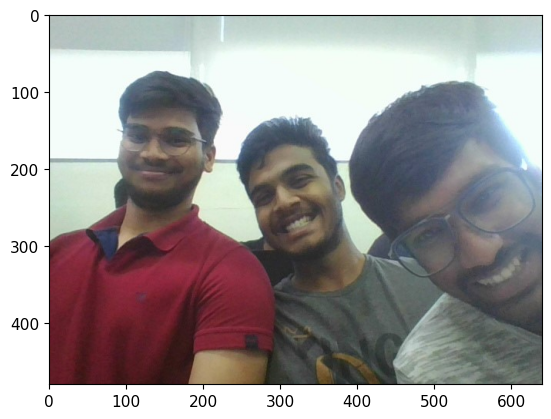

In [9]:
plt.imshow(image)
plt.show()

# Checking on heading

In [6]:
def crop(results,image):
  cropped = []
  w = image.shape[1]
  h = image.shape[0]
  for result in results[0]:
    if int(result[5]) == 0:
      x1 = int((result[0]-(result[2]/2))*w)
      y1 = int((result[1]-(result[3]/2))*h)
      x2 = int((result[0]+(result[2]/2))*w)
      y2 = int((result[1]+(result[3]/2))*h)
      cropped.append(image[y1:y2,x1:x2,:])
  return cropped

def blur_section(cropped):
  blurred = []
  for section in cropped:
    blurred.append(cv2.blur(section,(20,20)))
  return blurred

def back(results,image,blurred):
  w = image.shape[1]
  h = image.shape[0]
  i = 0
  for result in results[0]:
    if int(result[5]) == 0:
      x1 = int((result[0]-(result[2]/2))*w)
      y1 = int((result[1]-(result[3]/2))*h)
      x2 = int((result[0]+(result[2]/2))*w)
      y2 = int((result[1]+(result[3]/2))*h)
      image[y1:y2,x1:x2,:] = blurred[i]
      i+=1
  return image

In [7]:
def generateBlurred(image,model):
  duplicate = copy.copy(image)
  final_image = copy.copy(image)
  results = model(duplicate)
  cropped = crop(results.xywhn,final_image)
  blurred = blur_section(cropped)
  final = back(results.xywhn,final_image,blurred)

  return final_image

# Blurring image

In [12]:
final_image = generateBlurred(image,yolo_model)

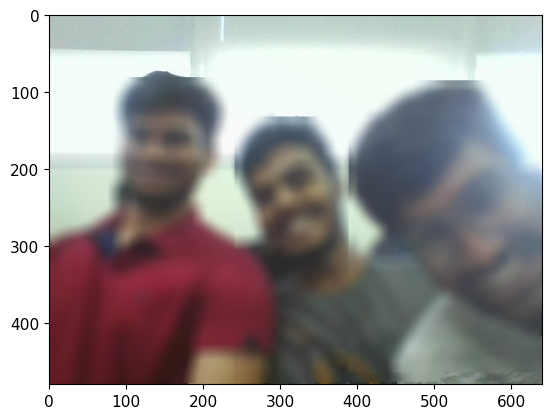

In [13]:
plt.imshow(final_image)

In [8]:
# Real time video test

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    newframe = generateBlurred(frame,yolo_model)
    cv2.imshow('frame', newframe)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# video capture

In [15]:
cap  = cv2.VideoCapture("ppl_running.mp4")

In [22]:
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
fcount = cap.get(cv2.CAP_PROP_FRAME_COUNT)
fps = cap.get(cv2.CAP_PROP_FPS)

In [17]:
fcount/fps

7.24

In [5]:
# checking the reader

while cap.isOpened():
    ret, frame = cap.read()
         # if frame is read correctly ret is True
    if not ret:
      print("Can't receive frame (stream end?). Exiting ...")
      break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.namedWindow('hello', cv2.WINDOW_NORMAL)
    cv2.imshow('hello',gray)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# Modifying and writing video

In [24]:
filename = "new.avi"
video_writer = cv2.VideoWriter(os.path.join(filename),cv2.VideoWriter_fourcc('P','I','M','1'),fps,(width,height))

In [34]:
while cap.isOpened():
    ret, frame = cap.read()
         # if frame is read correctly ret is True
    if not ret:
      print("Can't receive frame (stream end?). Exiting ...")
      break

    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    #cv2.namedWindow('hello', cv2.WINDOW_NORMAL)
    #cv2.imshow('hello',image)
    final_image = generateBlurred(image,yolo_model)
    video_writer.write(final_image)
    
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

video_writer.release()
cap.release()
cv2.destroyAllWindows()

Can't receive frame (stream end?). Exiting ...


#  Deep Face

In [4]:
from deepface import DeepFace
from deepface.commons import functions

In [18]:
model_name = "VGG-Face"

target_size = functions.find_target_size(model_name = model_name)
 
img1 = DeepFace.extract_faces(img_path = "test_1.jpg", target_size=target_size, detector_backend ="mtcnn")
 
img1 = np.expand_dims(img1, axis=0) #(224, 224, 3) to (1, 224, 224, 3)

1/1 [==============================] - 0s 64ms/step


In [78]:
img1.shape[1]

2

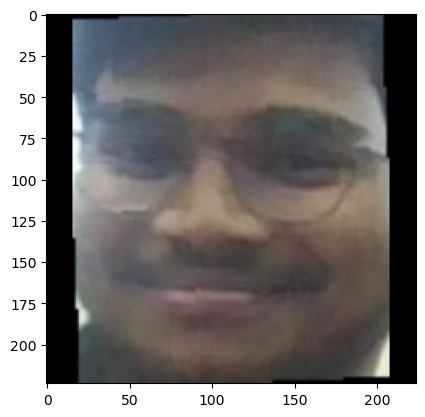

In [30]:
plt.imshow(img1[0][0]['face'])

In [60]:
x = img1[0][0]['facial_area']['x']
y = img1[0][0]['facial_area']['y']
w = img1[0][0]['facial_area']['w']
h = img1[0][0]['facial_area']['h']
results = [[x,y,w,h]]

In [81]:
def extractResults(processed):
    results = []
    n = processed.shape[1]
    
    for i in range(n):
        x = img1[0][i]['facial_area']['x']
        y = img1[0][i]['facial_area']['y']
        w = img1[0][i]['facial_area']['w']
        h = img1[0][i]['facial_area']['h']
        results.append([x,y,w,h])
    return results
    
def getFaces(results,image):
  cropped = []
  w = image.shape[1]
  h = image.shape[0]
  for result in results:
      x1 = result[0]
      y1 = result[1]
      x2 = result[0] + result[2]
      y2 = result[1] + result[3]
      cropped.append(image[y1:y2,x1:x2,:])
  return cropped

In [84]:
results = extractResults(img1)

In [85]:
image = cv2.imread("test_1.jpg")
copied = copy.copy(image)

cropped = getFaces(results,copied)

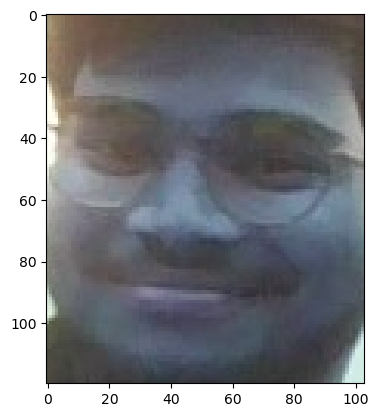

In [89]:
plt.imshow(cropped[0])

In [15]:
model = DeepFace.build_model(model_name = model_name)

vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: C:\Users\Hp\.deepface\weights\vgg_face_weights.h5
100%|███████████████████████████████████████████████████████████████████████████████| 580M/580M [00:49<00:00, 11.7MB/s]


In [90]:
img1_representation = model.predict(img1)[0].tolist()

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type dict).

In [94]:
copied = np.expand_dims(cropped[0], axis=0)
obj = model.predict(copied)

ValueError: in user code:

    File "C:\Users\Hp\anaconda3\lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\Hp\anaconda3\lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Hp\anaconda3\lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\Hp\anaconda3\lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "C:\Users\Hp\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\Hp\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_3" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 120, 103, 3)


In [17]:
img1.shape

(1, 2)

In [ ]:
distance_vector = np.square(img1_representation - img2_representation) #getting distance from representation
distance = np.sqrt(distance_vector.sum())